In [1]:
import numpy as np
from sklearn.datasets import load_iris
import tensorflow as tf

In [15]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [18]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [20]:
print(len(X_train))

55000


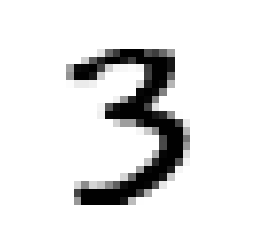

In [21]:
test_digit = X_train[5000]
test_digit_image = test_digit.reshape(28,28)

plt.imshow(test_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [22]:
y_train[5000]

3

In [24]:
import numpy as np

shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [25]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], 
                                         n_classes=10, feature_columns=feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/td/4jttxk_j59ngw4ck3xdp25th0000gn/T/tmp46clab_2', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12a2199e8>, '_is_chief': True, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_task_id': 0, '_master': '', '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_num_worker_replicas': 0, '_environment': 'local', '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_task_type': None, '_session_config': None}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags 

SKCompat()

In [26]:
from sklearn.metrics import accuracy_score
y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from /var/folders/td/4jttxk_j59ngw4ck3xdp25th0000gn/T/tmp46clab_2/model.ckpt-40000


0.98280000000000001